## **LDA con Bigramas y Diagnóstico de Tópicos con Coherencia Semántica -  Natural Language Processing**
-----------------------
<div align="right">

</div>



# **I.- Introducción**

El análisis de texto es una técnica esencial en minería de datos y ciencia de datos, especialmente cuando se trata de grandes volúmenes de datos no estructurados. Una de las metodologías más robustas y ampliamente utilizadas en este ámbito es el Topic Modeling, para identificar y extraer temas subyacentes en un conjunto de documentos.

El Topic Modeling se ha consolidado como una técnica estándar en el análisis de texto debido a su capacidad para manejar y procesar grandes volúmenes de datos textuales, lo cual es útil en contextos donde se necesita extraer información significativa.

Una de las principales ventajas es su capacidad para identificar temas recurrentes en un corpus de documentos. Asimismo, a través de algoritmos como LDA (Latent Dirichlet Allocation) se pueden descubrir patrones temáticos que no son evidentes a simple vista, proporcionando insights valiosos y facilitando la comprensión del contenido.

A diferencia de otros métodos de clasificación de texto, el Topic Modeling utiliza técnicas estadísticas para agrupar palabras y documentos de manera objetiva, permitiendo clasificar minimizando el sesgo humano y mejorando la fiabilidad de los resultados.

En esta tarea se aplica Topic Modeling a un conjunto de datos de los cabildos provinciales, con el objetivo de identificar y etiquetar los temas predominantes (Tópicos). Además, a través de la incorporación de bigramas y el análisis de coherencia semántica, se busca mejorar la interpretabilidad y precisión de los modelos temáticos generados.

# **II.- Desarrollo**

## **A.- Flujo de Trabajo**

1. **Configuración inicial.**
    - Importación de librerías
    - Configuración de Stanza y NLTK

2. **Carga y Preprocesamiento de Texto.**
    - Carga del dataset.
    - Lematización.
    - Preprocesamiento de Texto.
    - Definición y eliminación de stopwords.
    - Filtro de oraciones con más de 2 palabras.
    - Tokenización.

3. **Ejecución de un modelo LDA incorporando Bigramas.**
    - Creación de Bigramas y adición al Corpus.
    - Diagnóstico de tópicos y elección de n° de tópicos y etiquetado.
    
4. **Evaluación del diagnóstico de tópicos mediante Coherencia Semántica.**
    - Elección de formas de cálculo de Coherencia Semántica a utilizar.
    - Evaluación del diagnóstico de tópicos.
    - Resultados de Coherencia Semántica.
    - Evaluación de la variabilidad en la Coherencia Semántica.


## **B.- Configuración Inicial**

### Importación de Librerías

In [1]:
!pip install gensim

In [2]:
!pip install stanza

In [3]:
import pandas as pd
import string
import stanza
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import gensim
import gensim.corpora as corpora
from gensim.models import Phrases, CoherenceModel, LdaModel
import matplotlib.pyplot as plt
from gensim.models import TfidfModel
from gensim.models.phrases import Phrases, Phraser



### Configuración de Stanza y Natural Language ToolKit

In [4]:
stanza.download('es')
nlp=stanza.Pipeline('es',processors='tokenize,mwt,pos,lemma,depparse')

2024-07-28 19:49:59 INFO: Downloaded file to C:\Users\carlo\stanza_resources\resources.json
2024-07-28 19:49:59 INFO: Downloading default packages for language: es (Spanish) ...
2024-07-28 19:50:00 INFO: File exists: C:\Users\carlo\stanza_resources\es\default.zip
2024-07-28 19:50:02 INFO: Finished downloading models and saved to C:\Users\carlo\stanza_resources
2024-07-28 19:50:02 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


2024-07-28 19:50:03 INFO: Downloaded file to C:\Users\carlo\stanza_resources\resources.json
2024-07-28 19:50:03 INFO: Loading these models for language: es (Spanish):
| Processor | Package           |
---------------------------------
| tokenize  | combined          |
| mwt       | combined          |
| pos       | combined_charlm   |
| lemma     | combined_nocharlm |
| depparse  | combined_charlm   |

2024-07-28 19:50:03 INFO: Using device: cpu
2024-07-28 19:50:03 INFO: Loading: tokenize
c:\Users\carlo\anaconda3\lib\site-packages\stanza\models\tokenization\trainer.py:82: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped t

Se descargó el modelo en español para Stanza, el cual se utilizará para la etapa de lemmatización.

## **C.- Carga y Preprocesamiento de Texto**

### Función para lemmatización

In [5]:
def lemmatizer(text):
    doc = nlp(text)
    return ' '.join([word.lemma for sentence in doc.sentences for word in sentence.words])

### Carga del dataset:

In [6]:
cabildos = pd.read_excel('cabildos_subset.xlsx')

In [7]:
cabildos.sample()

,fundamento
407,QUE TODOS TENGAMOS LA POSIBILIDAD DE VIVIR Y D...


In [8]:
cabildos.size

3534

El dataset se compone de 3534 documentos.

### Definición de stopwords con infinitivos y palabras específicas:

In [11]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\carlo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [12]:
infinitivos = ['ser', 'tener', 'deber', 'estar', 'hacer', 'poder', 'decir', 'ver', 'dar', 'saber', 'querer', 'llegar', 'pasar', 'deber', 'poner', 'parecer', 'quedar', 'creer', 'hablar', 'llevar', 'dejar', 'seguir', 'encontrar', 'llamar', 'venir', 'pensar', 'salir', 'volver', 'tomar', 'conocer', 'vivir', 'sentir', 'tratar', 'mirar', 'contar', 'empezar', 'esperar', 'buscar', 'existir', 'entrar', 'trabajar', 'escribir', 'perder', 'producir', 'ocurrir', 'entender', 'pedir', 'recibir', 'recordar', 'terminar', 'permitir', 'aparecer', 'conseguir', 'comenzar', 'servir', 'sacar', 'necesitar', 'mantener', 'resultar', 'leer', 'caer', 'cambiar', 'presentar', 'crear', 'abrir', 'considerar', 'oír', 'acabar', 'convertir', 'ganar', 'formar', 'traer', 'partir', 'morir', 'aceptar', 'realizar', 'suponer', 'comprender', 'lograr', 'explicar', 'preguntar', 'tocar', 'reconocer', 'estudiar', 'alcanzar', 'nacer', 'dirigir', 'correr', 'utilizar', 'pagar', 'ayudar', 'gustar', 'jugar', 'escuchar', 'cumplir', 'ofrecer', 'descubrir', 'levantar', 'intentar', 'usar', 'decidir', 'repetir', 'olvidar', 'valer', 'comer', 'mostrar', 'ocupar', 'mover', 'continuar', 'aprender', 'comprar', 'subir', 'evitar', 'interesar', 'cerrar', 'comprobar', 'apoyar', 'negar', 'aceptar', 'proponer', 'enseñar', 'desarrollar', 'aumentar', 'superar', 'elegir', 'establecer', 'responder', 'actuar', 'añadir', 'marcar', 'atender', 'descubrir', 'probar', 'representar', 'solicitar', 'avanzar', 'levantar', 'entregar', 'proteger', 'fomentar', 'ocultar', 'atacar', 'escoger', 'declarar', 'vender', 'mencionar', 'dirigir', 'intervenir', 'asegurar', 'disponer', 'plantear', 'generar', 'identificar', 'aportar', 'proporcionar']
palabras_remover = ['estado', 'estados']
esp_stop = set(stopwords.words('spanish') + infinitivos + palabras_remover)


Se definieron palabras que no aportan valor semántico significativo y que pueden introducir ruido en el modelo. Además de los stopwords, se agregaron ciertos infinitivos y palabras específicas que son frecuentes pero no informativas en el contexto de los cabildos provinciales.

### Lemmatización

In [13]:
cabildos['lemma'] = cabildos['fundamento'].apply(lemmatizer)

Se reducieron las palabras a su forma base o raíz, eliminando las variaciones morfológicas.

### Preprocesamiento de Texto

In [14]:
cabildos['lemma']=cabildos['lemma'].apply(lambda x: x.lower())
cabildos['lemma']=cabildos['lemma'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
cabildos['lemma']=cabildos['lemma'].apply(lambda x: x.translate(str.maketrans('', '', string.digits)))
cabildos['lemma']=cabildos['lemma'].apply(lambda x: x.strip())
cabildos['lemma']=cabildos['lemma'].apply(lambda x: x.replace('\n',' '))

El preprocesamiento realizado transforma el texto en una forma uniforme y limpia, eliminando elementos innecesarios que podrían introducir ruido en el análisis, tales como: puntuación, dígitos, espacios en blanco al principio y al final, saltos de línea, entre otros.

### Eliminación de Stopwords

In [15]:
cabildos['lemma'] = cabildos['lemma'].apply(lambda x: ' '.join([word for word in x.split() if word not in esp_stop]))

### Filtro de oraciones con más de 2 palabras

In [16]:
cabildos=cabildos[[len(x.split())>2 for x in cabildos.lemma]]     
cabildos = cabildos.reset_index(drop=True)

In [18]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\carlo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

### Tokenización

In [19]:
cabildos['tokenized']=cabildos['lemma'].apply(word_tokenize)

In [20]:
cabildos.size

7479

In [21]:
cabildos.sample(30).tokenized.tolist()

[['garantizar',
  'red',
  'atención',
  'salud',
  'persona',
  'estandar',
  'calidad',
  'hincapie',
  'existencia',
  'especialista',
  'regio',
  'país',
  'aquel',
  'profesional',
  'recurso',
  'público',
  'incluir',
  'salud',
  'holistico',
  'mejorar'],
 ['gobernar',
  'sociedad',
  'acción',
  'garantizar',
  'justicia',
  'discriminación',
  'persona'],
 ['garantizado', 'constitución', 'país'],
 ['seguridad',
  'leyes',
  'social',
  'leyes',
  'penales',
  'leyes',
  'polttica',
  'pública'],
 ['garantizado', 'gratuita', 'calidad', 'laico', 'sexista'],
 ['familia',
  'condición',
  'confort',
  'básico',
  'luz',
  'agua',
  'espacio',
  'persona'],
 ['independiente',
  'parcial',
  'juez',
  'sociedad',
  'justicia',
  'jerárquico',
  'juez',
  'manera',
  'democratico',
  'vinculado',
  'sociedad'],
 ['promover',
  'mayor',
  'descentralización',
  'transparencia',
  'distinto',
  'región',
  'comuna',
  'territorio',
  'derecho',
  'legitimo'],
 ['entendida',
  'conse

## **D.- Ejecución de un modelo LDA incorporando bigramas**

### **1.- Creación de Bigramas y adición al corpus**

#### Creación de Bigramas:

In [22]:
bigram = Phrases(cabildos['tokenized'], min_count=3, threshold=6)
bigram_mod = Phraser(bigram)

- En este caso se eligió el hiperparámetro **min_count=3**, es decir, se consideran aquellos pares de palabras que aparecen juntos al menos tres veces en el corpus, eliminando de esta forma bigramas poco frecuentes que podrían no ser significativos, mientras se identifican combinaciones de palabras que ocurren con suficiente frecuencia para ser relevantes.

- Respecto al hiperparámetro **threshold=6**, se está diciendo que el modelo debe estar bastante seguro de que un par de palabras es un bigrama significativo antes de aceptarlo, es decir, funciona como un filtro para que realmente los bigramas sean significativos y no solo coincidencias. Al igual que un filtro, un umbral más alto reduce el ruido y mejora la calidad de los bigramas seleccionados.


#### Aplicación de Bigramas al texto tokenizado:

In [23]:
cabildos['bigrams'] = cabildos['tokenized'].apply(lambda doc: bigram_mod[doc])


In [24]:
for doc in cabildos['bigrams'].sample(5):
    print(doc)


['principio_valor', 'constitución', 'política', 'implicar', 'mayor', 'capacidad', 'toma_decisión', 'participación', 'distribución_recurso', 'región']
['derecho', 'social', 'garantizado', 'educacion_publica', 'gratuita', 'obligatoria', 'laica', 'sexista', 'formacion', 'valorica', 'habito', 'funcion', 'bien_comun']
['haber', 'acceso_igualitario', 'justicia', 'ley', 'pareja', 'dignidad_persona', 'aplicar', 'justicia']
['santiago_chile', 'ingresar', 'valor_sino', 'organización']
['provenga', 'ejecutivo', 'elección_autoridad', 'regional', 'descentralización', 'fiscal', 'recursos', 'distribución_equitativo', 'recurso', 'sociedad', 'mas', 'integrado']


#### Creación de Diccionario y Corpus utilizando los Bigramas:

In [25]:
id2word = corpora.Dictionary(cabildos['bigrams'])
texts = cabildos['bigrams']
corpus = [id2word.doc2bow(text) for text in texts]

### **2.- Diagnóstico de tópicos y elección de n° de tópicos para el modelo**


#### Creación de matriz TF-iDF

In [26]:
tfidf = TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

In [27]:
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)]]


#### Cálculo de coherencia del modelo LDA para diferentes números de tópicos:

In [28]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=1):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary, random_state=42)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

In [29]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus_tfidf, texts=cabildos['bigrams'], start=2, limit=12, step=1)

#### Resultados de coherencia:

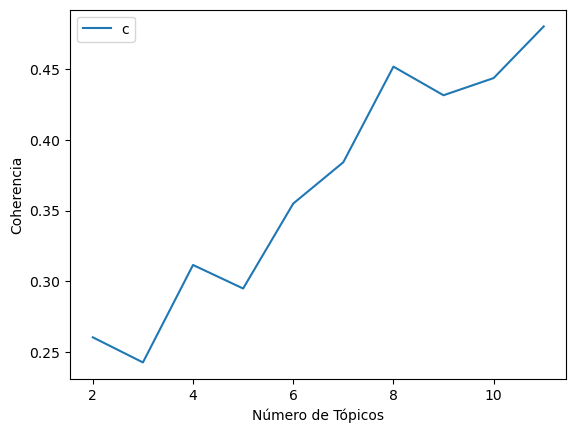

In [30]:
limit = 12; start = 2; step = 1
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Número de Tópicos")
plt.ylabel("Coherencia")
plt.legend(("coherencia"), loc='best')
plt.show()

#### Justificación de la elección de número de tópicos elegido:
La curva anterior indica cómo varía la coherencia del modelo LDA con diferentes números de tópicos. Se observa que los valores de coherencia semántica aumentan en 4, 6 y 8 tópicos, por lo tanto, se podrían elegir estas cantidades para entrenar los modelos LDA.

- Con 4 tópicos podría ser más sencillo y más fácil de interpretar, pero podría no capturar toda la diversidad de temas.
- 6 tópicos es un punto intermedio entre simplicidad y diversidad.
- A su vez, con 8 tópicos puede que se capturen más temas, pero puede que se dificulte la interpretación.

En el desafío se solicita solamente etiquetar cinco, por lo que reemplazaremos 4 por 5 tópicos, y de igual manera consideramos que es relevante evaluar los resultados de 6 y 8 tópicos.

### **3.- Ejecución del modelo LDA y etiquetado.**

#### a.- Modelo LDA y etiquetado de 5 tópicos:

In [37]:
num_topics = 5
lda_model = LdaModel(corpus=corpus, num_topics=num_topics, id2word=id2word, random_state=42)
topics = lda_model.print_topics(num_words=10)
for idx, topic in topics:
    print(f'Topic {idx}: {topic}')

Topic 0: 0.024*"derecho" + 0.015*"vivienda" + 0.013*"calidad" + 0.013*"región" + 0.011*"garantizar" + 0.011*"vida" + 0.011*"decisión" + 0.009*"territorial" + 0.008*"acceso" + 0.008*"recurso"
Topic 1: 0.057*"calidad" + 0.033*"derecho" + 0.017*"educación" + 0.015*"salud" + 0.015*"garantizado" + 0.014*"justicia" + 0.013*"gratuito" + 0.011*"garantizar" + 0.011*"acceso" + 0.009*"universal"
Topic 2: 0.015*"salud" + 0.014*"sistema" + 0.014*"digno" + 0.011*"recurso" + 0.011*"garantizar" + 0.010*"calidad" + 0.008*"justicia" + 0.008*"decisión" + 0.008*"derecho" + 0.008*"derecho_vida"
Topic 3: 0.034*"derecho" + 0.021*"vida" + 0.021*"persona" + 0.016*"justicia" + 0.012*"garantizar" + 0.011*"región" + 0.009*"haber" + 0.009*"descentralización" + 0.009*"igualdad" + 0.008*"derecho_vida"
Topic 4: 0.026*"derecho" + 0.018*"salud" + 0.017*"justicia" + 0.015*"valor" + 0.015*"acceso" + 0.014*"calidad" + 0.013*"concepto" + 0.012*"social" + 0.010*"persona" + 0.009*"importante"


- **Etiquetado de los 5 tópicos**:

    - Tópico 0: **"Derecho a la vivienda"**: Se menciona frecuentemente "derecho", "vivienda", "calidad", "región", "garantizar", "vida", indicando un enfoque hacia el derecho a la vivienda digna y de calidad. Este énfasis subraya la importancia de garantizar condiciones de vida adecuadas en todas las regiones.

    - Tópico 1: **"Derecho a la educación de calidad"**: El tópico 1 tiene como palabras clave "calidad" (con una fuerte componente), "derecho", "educación", "salud", "garantizado", "justicia" y "gratuito", por lo tanto tiene un enfoque claro en garantizar una educación de calidad y gratuita.

    - Tópico 2: **"Salud y Recursos"**: En este caso se menciona "salud", "sistema", "digno", "recurso", "garantizar" y "calidad", por lo tanto, indica un enfoque en salud digna y de calidad, y que existan los recursos para financiarla.

    - Tópico 3: **"Justicia y Derechos Humanos"**: las palabras "derecho", "vida", "persona", "justicia", "garantizar", "región" y "descentralización" indican que este tópico se centra en la justicia y los derechos humanos, con un leve enfoque territorial y de descentralización.

    - Tópico 4: **"Derecho a la salud"**: las palabras "derecho", "salud", "justicia", "valor", "acceso" y "calidad" sugieren que se trata del derecho a la salud, abordado de una forma purista. 

#### b.- Modelo LDA y etiquetado de 6 tópicos:

- **Ejecución del modelo LDA con 6 tópicos**.

In [32]:
num_topics = 6
lda_model = LdaModel(corpus=corpus, num_topics=num_topics, id2word=id2word, random_state=42)
topics = lda_model.print_topics(num_words=10)
for idx, topic in topics:
    print(f'Topic {idx}: {topic}')

Topic 0: 0.024*"derecho" + 0.015*"calidad" + 0.014*"vivienda" + 0.014*"región" + 0.011*"salud" + 0.011*"decisión" + 0.010*"garantizar" + 0.010*"territorial" + 0.010*"acceso" + 0.009*"vida"
Topic 1: 0.066*"calidad" + 0.040*"derecho" + 0.019*"educación" + 0.017*"garantizado" + 0.017*"salud" + 0.015*"gratuito" + 0.011*"garantizar" + 0.010*"acceso" + 0.009*"educacion" + 0.009*"igualdad"
Topic 2: 0.018*"digno" + 0.016*"salud" + 0.013*"derecho_vida" + 0.013*"sistema" + 0.012*"decisión" + 0.010*"recurso" + 0.009*"garantizar" + 0.008*"educación" + 0.008*"derecho" + 0.008*"concepto"
Topic 3: 0.042*"derecho" + 0.021*"persona" + 0.020*"vida" + 0.013*"descentralización" + 0.012*"región" + 0.012*"garantizar" + 0.009*"salud" + 0.009*"económico" + 0.008*"justicia" + 0.008*"humano"
Topic 4: 0.031*"derecho" + 0.021*"salud" + 0.017*"acceso" + 0.016*"calidad" + 0.016*"valor" + 0.015*"concepto" + 0.013*"justicia" + 0.013*"social" + 0.011*"persona" + 0.009*"importante"
Topic 5: 0.038*"justicia" + 0.016*"pe

- **Etiquetado de los 6 tópicos**:

    - Tópico 0: **"Derechos Regionales y Vivienda"**: Este tópico incluye "derecho", "vivienda", "región" y "territorial", indicando un enfoque en los derechos a nivel regional y en la vivienda.

    - Tópico 1: **"Calidad y Educación"**: Las palabras "calidad", "derecho", "educación" y "salud" tienen un enfoque en la calidad y la educación.

    - Tópico 2: **"Salud y Decisiones"**: Se menciona en este tópico "digno", "salud", "decisión" y "sistema", por lo tanto, existe un enfoque en la salud y la toma de decisiones.

    - Tópico 3: **"Desentralización y Justicia"**: las palabras "derecho", "desentralización", "región" y "económico" indican un enfoque en la desentralización y la justicia en términos económicos.
    
    - Tópico 4: **"Acceso y Valores Sociales"**: Las palabras "derecho", "salud", "acceso", "valor" y "justicia" sugieren un enfoque en el acceso a derechos y los valores sociales.

    - Tópico 5: **"Igualdad y Constitución"**: En este tópico se menciona "justicia", "persona", "vida", "derecho", "garantizar", "igualdad" y "constitución", por lo tanto, este tópico tiene un enfoque en la igualdad y aspectos constitucionales.

#### c.- Modelo LDA y etiquetado de 8 tópicos:

- **Ejecución del modelo LDA con 8 tópicos**.

In [33]:
num_topics = 8
lda_model = LdaModel(corpus=corpus, num_topics=num_topics, id2word=id2word, random_state=42)
topics = lda_model.print_topics(num_words=10)
for idx, topic in topics:
    print(f'Topic {idx}: {topic}')

Topic 0: 0.031*"derecho" + 0.021*"vivienda" + 0.012*"calidad" + 0.012*"necesidad" + 0.012*"vida" + 0.011*"territorial" + 0.010*"garantizar" + 0.010*"región" + 0.009*"recurso" + 0.009*"acceso"
Topic 1: 0.071*"calidad" + 0.041*"derecho" + 0.024*"educación" + 0.021*"gratuito" + 0.017*"garantizado" + 0.016*"básico" + 0.013*"salud" + 0.013*"garantizar" + 0.011*"nivel" + 0.008*"acceso_universal"
Topic 2: 0.023*"salud" + 0.017*"digno" + 0.015*"derecho_vida" + 0.014*"educación" + 0.013*"derecho" + 0.012*"decisión" + 0.011*"calidad" + 0.010*"sistema" + 0.009*"garantizada" + 0.009*"garantizar"
Topic 3: 0.044*"derecho" + 0.014*"persona" + 0.013*"justicia" + 0.012*"región" + 0.012*"garantizar" + 0.012*"vida" + 0.011*"descentralización" + 0.010*"decisión" + 0.010*"valor" + 0.009*"respetar"
Topic 4: 0.031*"derecho" + 0.023*"salud" + 0.023*"acceso" + 0.015*"concepto" + 0.014*"social" + 0.013*"justicia" + 0.012*"garantizado" + 0.011*"valor" + 0.011*"calidad" + 0.011*"fundamental"
Topic 5: 0.047*"justi

- **Etiquetado de los 8 tópicos**:

    - Tópico 0: **"Derechos y Vivienda"**: Este tópico incluye "derecho", "vivienda", "calidad" y "vida", indicando un enfoque en vivienda y calidad de vida.

    - Tópico 1: **"Calidad y Educación"**: Las palabras "calidad", "derecho", "educación", "gratuito" y "garantizado" tienen un enfoque en la educación y el acceso gratuito

    - Tópico 2: **"Salud y Decisiones"**: Se menciona en este tópico "digno", "salud", "decisión" y "derecho_vida", por lo tanto, existe un enfoque en la salud y la toma de decisiones relacionadas con la vida.

    - Tópico 3: **"Desentralización y Justicia"**: las palabras "derecho", "justicia", "región" y "desentralización" indican un enfoque en la justicia y la desentralización.
    
    - Tópico 4: **"Acceso y Valores Sociales"**: Las palabras "derecho", "salud", "acceso" y "social" sugieren un enfoque en el acceso a derechos y los valores sociales.

    - Tópico 5: **"Justicia y Constitución"**: En este tópico se menciona "justicia", "derecho", "igualdad" y "constitución", por lo tanto, este tópico tiene un enfoque en la igualdad y aspectos constitucionales.

    - Tópico 6: **"Calidad de Vida y Salud"**: En este tópico se menciona "calidad", "vida", "salud" y "derecho", por lo tanto hay un enfoque en la calidad de vida y la salud.

    - Tópico 7: **"Derechos y Recursos"**: En este tópico se menciona "derecho", "persona", "calidad", "región" y "recurso", por lo tanto, tiene un enfoque en los derechos de las personas y gestión de recursos regionales.

## **E.- Evaluación del diagnóstico de tópicos mediante coherencia semántica**

A continuación se da a concer la evaluación del diagnóstico de tópicos obtenido mediante Coherencia Semántica para el modelo LDA entrenado con la combinación de tokens y bigramas.

### **1.- Formas de cálculo de Coherencia Semántica a utilizar**

La Coherencia Semántica se utiliza para evaluar la calidad de los tópicos generados por modelos de Topic Modeling, como LDA. En este contexto, Gensim incorpora varias formas de calcular la Coherencia Semántica, a continuación se dan a conocer dos métodos que se utilizarán en esta tarea.

- El método **'u_mass'** calcula la Coherencia basándose en la probabilidad de co-ocurrencias de palabras dentro de un conjunto de documentos. Este método no requiere un corpus de texto adicional y se basa en estadísticas internas del modelo. Además, es especialmente útil para análisis exploratorios rápidos, aunque puede ser menos intuitivo que otros métodos que consideran la similitud semántica.
    

- El método **'c_v'** calcula la coherencia basándose en la similitud de pares de palabras en un espacio de palabras, utilizando un modelo de ventana deslizante. Este método combina varias métricas de similitud, incluidas las similitudes de palabras en un espacio vectorial y tiende a proporcionar resultados más intuitivos y consistentes. Además, es utilizado debido a su robustez y su capacidad para reflejar interpretabilidad de los tópicos.

*Referencia Bibliográfica: https://radimrehurek.com/gensim/models/coherencemodel.html*

### **2.- Evaluación del diagnóstico de tópicos.**

#### Cálculo de Coherencia Semántica para diferentes número de tópicos:

In [34]:
limit = 12
start = 2
step = 1
x = range(start, limit, step)

coherence_values_u_mass = []
coherence_values_c_v = []

for num_topics in x:
    model = LdaModel(corpus=corpus, num_topics=num_topics, id2word=id2word, random_state=42)
    coherencemodel_u_mass = CoherenceModel(model=model, corpus=corpus_tfidf, dictionary=id2word, coherence='u_mass')
    coherence_values_u_mass.append(coherencemodel_u_mass.get_coherence())
    
    coherencemodel_c_v = CoherenceModel(model=model, texts=cabildos['bigrams'], dictionary=id2word, coherence='c_v')
    coherence_values_c_v.append(coherencemodel_c_v.get_coherence())

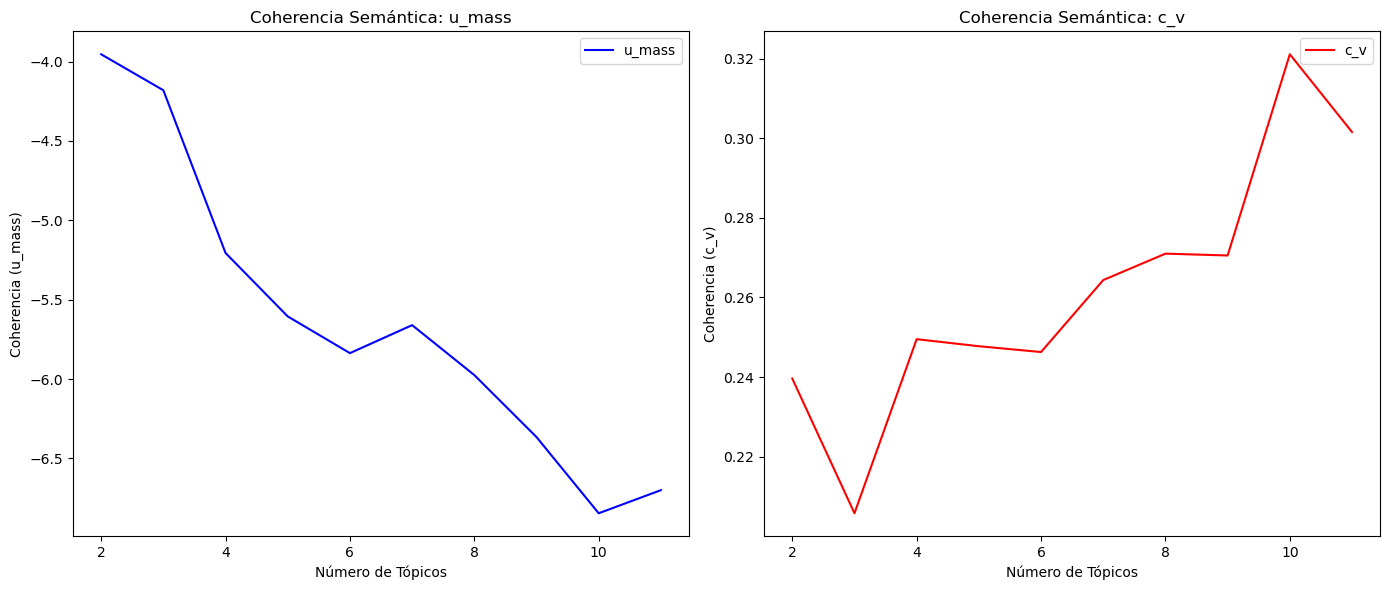

In [35]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.plot(x, coherence_values_u_mass, label='u_mass', color='blue')
ax1.set_title('Coherencia Semántica: u_mass')
ax1.set_xlabel("Número de Tópicos")
ax1.set_ylabel("Coherencia (u_mass)")
ax1.legend()

ax2.plot(x, coherence_values_c_v, label='c_v', color='red')
ax2.set_title('Coherencia Semántica: c_v')
ax2.set_xlabel("Número de Tópicos")
ax2.set_ylabel("Coherencia (c_v)")
ax2.legend()

plt.tight_layout()
plt.show()

#### Comparación de resultados de coherencia (u_mass vs c_v)

- **Método 'u_mass'**
    - El resultado de coherencia mediante 'u_mass' se basa en logaritmos de probabilidades, por lo tanto no es tan fácil de interpretar.
    - Según este método de cálculo de coherencia semántica, mientras más tópicos se tiende a una menor coherencia.
    - Es útil para evaluar la cogerencia interna de los temas, pero puede ser más sensible a la variabilidad en la frecuencia de palabras en el corpus.
    - La gráfica señala como óptimo el uso de 2 tópicos (valor menos negativo).

- **Método 'c_v'**
    - En el caso de la evaluación de coherencia mediante 'c_v', se puede interpretar de forma más intuitiva, ya que los valores por lo general son entre 0 y 1.
    - La gráfica del método 'c_v' muestra una tendencia ascendente, con un peak notable en 10 tópicos. La tendencia ascendente sugiere que la coherencia semántica mejora con un mayor número de tópicos.

En resumen, los resultados de la comparación muestran que estos varían bastante, debido a que estos usan diferentes metodologías para calcular la coherencia. U_Mass se basa en la frecuencia de co-ocurrencia en el documento, mientras que C_V utiliza un modelo de bigramas para capturar la coherencia en contextos más amplios. Otro factor importante es que la ventana de contexto para calcular la coherencia puede diferir entre las dos métricas. U_Mass utiliza una ventana fija en el corpus, mientras que C_V ajusta el cálculo según el contexto lingüístico proporcionado por el modelo de bigramas.

### **3.- Ejecución del modelo LDA y etiquetado con 10 tópicos.**

En base al resultado obtenido en la evaluación de coherencia semántica mediante 'c_v' se pudo interpretar intuitivamente que con 10 tópicos se obtiene una mejor interpretación y coherencia. A continuación se entrena el modelo LDA con esta cantidad de tópicos y posteriormente se etiquetan los tópicos.

- **Ejecución del modelo LDA con 10 tópicos**.

In [36]:
num_topics = 10
lda_model = LdaModel(corpus=corpus, num_topics=num_topics, id2word=id2word, random_state=42)
topics = lda_model.print_topics(num_words=10)
for idx, topic in topics:
    print(f'Topic {idx}: {topic}')

Topic 0: 0.026*"derecho" + 0.016*"garantizar" + 0.016*"necesidad" + 0.016*"vivienda" + 0.012*"región" + 0.010*"territorio" + 0.010*"region" + 0.010*"autonomía" + 0.010*"territorial" + 0.009*"calidad"
Topic 1: 0.073*"calidad" + 0.044*"derecho" + 0.024*"gratuito" + 0.023*"garantizado" + 0.023*"salud" + 0.022*"educación" + 0.016*"garantizar" + 0.013*"universal" + 0.011*"básico" + 0.011*"acceso"
Topic 2: 0.019*"salud" + 0.017*"digno" + 0.016*"garantizar" + 0.016*"derecho_vida" + 0.012*"derecho" + 0.012*"aborto" + 0.011*"concepto" + 0.010*"brindar" + 0.010*"garantizar_acceso" + 0.009*"sistema"
Topic 3: 0.047*"derecho" + 0.017*"persona" + 0.011*"región" + 0.010*"salud" + 0.010*"respetar" + 0.010*"descentralización" + 0.009*"económico" + 0.009*"vida" + 0.009*"ciudadano" + 0.008*"social"
Topic 4: 0.043*"derecho" + 0.027*"salud" + 0.024*"acceso" + 0.018*"valor" + 0.017*"justicia" + 0.016*"calidad" + 0.015*"garantizar" + 0.015*"garantizado" + 0.013*"social" + 0.013*"fundamental"
Topic 5: 0.054*"

- **Etiquetado de los 10 tópicos**:

    - Tópico 0: **"Derechos Regionales y Vivienda"**: Este tópico incluye "derecho", "garantizar", "necesidad", "vivienda", "región" y "autonomía", indicando un enfoque en derechos a nivel regional y la vivienda.

    - Tópico 1: **"Educación y Salud de Calidad y Gratuitas"**: Las palabras "calidad", "derecho", "gratuito", "garantizado", "salud" y "educación" tienen un enfoque en la calidad de los servicios de educación y salud y su acceso gratuito, garantizado y de calidad.

    - Tópico 2: **"Salud y Derechos de Vida"**: Se menciona en este tópico "digno", "salud", "garantizar", "derecho_vida" y "aborto", por lo tanto, existe un enfoque en la salud y los derechos relacionados con la vida y la dignidad.

    - Tópico 3: **"Desentralización y Justicia Económica"**: Las palabras "derecho", "persona", "región", "descentralización", y "económico" sugieren un enfoque en la descentralización y la justicia económica.
    
    - Tópico 4: **"Acceso y Valores Sociales"**: Las palabras "derecho", "justicia", "salud", "acceso", "valor", "calidad", indican un enfoque en el acceso a derechos y valores sociales fundamentales.

    - Tópico 5: **"Justicia e Igualdad"**: Las palabras "justicia", "igualdad", "vida", "decisión", y "región" sugieren un enfoque en la justicia y la igualdad de derechos.

    - Tópico 6: **"Calidad de Vida y Salud"**: Este tópico incluye "vida", "calidad", "persona", "garantizar", "salud", y "derecho_vida", lo que sugiere un enfoque en la calidad de vida y la salud.

    - Tópico 7: **"Desarrollo Regional y Descentralización"**: Las palabras "región", "persona", "desarrollo", "decisión", "descentralización", y "principio" indican un enfoque en el desarrollo regional y la descentralización.

    - Tópico 8: **"Calidad de Vida y Recursos"**: Las palabras "calidad", "vida", "salud", "acceso", "digno", y "recurso", sugieren un enfoque en la calidad de vida y el acceso a recursos.

    - Tópico 9: **"Justicia Social y Educación"**: Las palabras "derecho", "justicia", "calidad", "social", "educación", y "igualdad" indican un enfoque en la justicia social y la educación.

### **4.- Evaluación de la variabilidad en la Coherencia Semántica.**

Para determinar si la diferencia observada en la Coherencia Semántica es producto del cambio en la forma de cálculo o una variación aleatoria inherente a los modelos, se puede considerar lo siguiente:

- **Revisión con expertos (Cualitativa).**
    Una opción es revisar manualmente los temas generados por cada método y evaluar la Coherencia y relevancia de cada tema. Posteriormente, consultando a expertos en el dominio para validad la interpretabilidad y calidad de los temas identificados.

- **Análisis Estadístico.**
    Una forma alternativa, sería calcular los promedios y desviaciones estándar de las Coherencias Semánticas obtenidas de multiples ejecuciones, y luego, utilizando pruebas estadísticas, como la prueba t-Student, comparar las medias de coherencia entre los dos métodos. En este caso, una diferencia significativa indicaría que el cambio en la forma de cálculo es la causa principal de la diferencia observada.

- **Visualización de la Variabilidad.**
    Finalmente, se podrían utilizar visualizaciones como diagramas de caja (boxplots) para analizar la distribución de los valores de Coherencia Semántica para cada método a través de múltiples ejecuciones, enfocándose en la variabilidad interna de cada método en comparación con la diferencia entre métodos.

## **F. Análisis de Resultados**

**1. Creación de Bigramas y Entrenamiento LDA.**

- Creación de Bigramas.
    - Se filtraron aquellos que aparecían al menos 3 veces y estableciendo un umbral de 6 para considerar un par de palabras como un bigrama significativo.
    - En este caso, se pueden probar con distintas configuraciones de los hiperparámetros y entrenar nuevos modelos LDA.

- Preparación del Corpus.
    - Se utilizó la matriz TF-IDF utilizando los bigramas generados.
    - Para esta tarea no se utilizó la matriz DTM, sin embargo, podría ser considerada de forma alternativa.

- Entrenamiento del modelo LDA.
    - Se entrenaron varios modelos LDA con diferentes números de tópicos (4, 6, 8 y 10) para identificar el número óptimo de tópicos basados en la coherencia semántica, los cuales se evaluaron como se explica a continuación.

**2. Evaluación de la Coherencia Semántica.**
Se evaluaron los modelos LDA entrenados utilizando dos métodos de coherencia semántica: 'u_mass' y 'c_v'.

- Coherencia obtenida mediante el método 'u_mass': 
    - Mostró una tendencia descendente a medida que aumentaba el número de tópicos.
    - La coherencia más alta se obseró con 2 tópicos y disminuyó continuamente hasta 10 tópicos. Por lo tanto, según este método, los modelos con menos tópicos tienden a ser más coherentes.
        
- Coherencia obtenida mediante el método 'c_v':
    - Mostró una tendencia ascendente con varios peaks, especialmente en 10 tópicos.
    - La tendencia ascendente sugiere que la coherencia mejora con un mayor número de tópicos, lo que indica una mayor granularidad y especificidad en los temas identificados.

**3. Análisis de Resultados entre 5, 6, 8 y 10 tópicos.**

- Modelo con 5 Tópicos: En este caso los temas son amplios y generales, abarcando aspectos como derechos, calidad de vida, salud y justicia, sin embargo, se percibe que no captura sistemas específicos, por lo tanto, podría ser considerado como un modelo para obtener una visión general de los principales temas del corpus.

- Modelo con 6 Tópicos: En este caso, los temas se detallan un poco más, permitiendo identificar áreas específicas como descentralización, justicia económica y acceso a derechos sociales. Se percibe que proporciona un equilibrio entre detalle y manejabilidad, siendo útil posiblemente en aplicaciones de análisis más profundos sin perder coherencia.

- Modelo con 8 Tópicos: Este modelo ofrece una descomposición aún mayor de los temas, permitiendo identificar con claridad subtemas como desarrollo regional, igualdad y recursos. Por lo tanto, como cuenta con una mayor especificidad, podría ser aplicable a estudios donde se requiere un análisis detallado, especificando entre diferentes áreas temáticas.

-  Modelo con 10 Tópicos: Este modelo ofrece la mayor granularidad, descomponiendo los temas en componentes muy específicos, como desarrollo regional, salud y derechos de vida, justicia social y educación.  Por lo tanto, puede ser útil para un análisis más profundo y detallado, sin embargo, los temas pueden superponerse afectando a la interpretación de los tópicos.

# **III.- Conclusión**

- En la creación de bigramas, se utilizaron los parámetros min_count=3 y threshold=6, lo cual permitió mejorar la interpretabilidad de los tópicos generados por los modelos LDA. Sin embargo, es recomendable probar nuevos modelos de bigramas con distintos hiperparámetros para evaluar cuál obtiene un mejor desempeño en la evaluación de coherencia semántica.

- La evaluación de la coherencia semántica mediante el método c_v permitió considerar 10 tópicos, algo que no se había visualizado en evaluaciones previas. Esto proporcionó una mayor granularidad y descomposición de los temas de forma más específica, mejorando la calidad y la interpretabilidad de los resultados.

- En cuanto a la elección final del número de tópicos, depende del nivel de detalle y especificidad requerido para el análisis:

    - 5 tópicos proporcionan una visión general de los temas principales, siendo útil para obtener una visión rápida y general de los datos.
    - 6 tópicos ofrecen un buen equilibrio entre detalle y manejabilidad, permitiendo identificar áreas específicas sin perder la coherencia global.
    - 8 tópicos permiten una mayor diferenciación de subtemas específicos, lo cual es beneficioso para un análisis más detallado y enfocado.
    - 10 tópicos sería ideal para estudios mas detallados, ya que ayudaría a realizar un análisis mas granular, aunque potencialmente más difícil de interpretar.

- Finalmente para la etapa de etiquetado, se podría proveer los grupos de tópicos a un grupo de expertos en el tema para que evalúen cualitativamente la bondad de ajuste de la palabra a la categoría, de forma de validar el análisis, asegurando que los tópicos identificados sean relevantes y significativos en el contexto del dominio específico.